# **Anomaly Detection & Time Series - Assignment**

**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

Anomaly detection is the process of identifying rare items or events in a dataset that differ significantly from normal behavior.

There are three main types: point anomalies, which are individual data points that are outliers; contextual anomalies, which are anomalous due to their context; and collective anomalies, which are a collection of related data points that are anomalous as a group.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) use distinct approaches to anomaly detection and are suited to different use cases.

Isolation Forest is a tree-based method ideal for large, high-dimensional datasets with global outliers, while LOF and DBSCAN are density-based methods that perform well with local outliers and arbitrary cluster shapes, respectively.

**Question 3: What are the key components of a Time Series? Explain each with one example.**

The four key components of a time series are trend, seasonal variation, cyclical variation, and irregular (or random) variation.

Trend is the long-term direction, seasonality is a repeating pattern at fixed intervals, cyclical variation is a repeating pattern over longer and irregular periods, and irregular variation is unpredictable, short-term fluctuations.

**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

A stationary time series has statistical properties like mean, variance, and autocorrelation that are constant over time.

To test for stationarity, the Augmented Dickey-Fuller (ADF) test is used, which checks for a unit root.

Non-stationary series can be transformed into a stationary one using methods like differencing (subtracting the previous observation from the current one) or by removing trends through curve fitting or detrending

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**

AR, MA, ARIMA, SARIMA, and SARIMAX are time series forecasting models that build on each other to account for different data patterns. AR and MA models predict future values based on past values or past forecast errors, respectively. ARIMA combines these and uses differencing to handle non-stationary data, while SARIMA adds seasonal components (P, D, Q) for data with recurring cycles. SARIMAX extends SARIMA further by incorporating external variables (exogenous regressors) to account for external influences.

Dataset:
- NYC Taxi Fare Data
- AirPassengers Dataset

**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.**

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


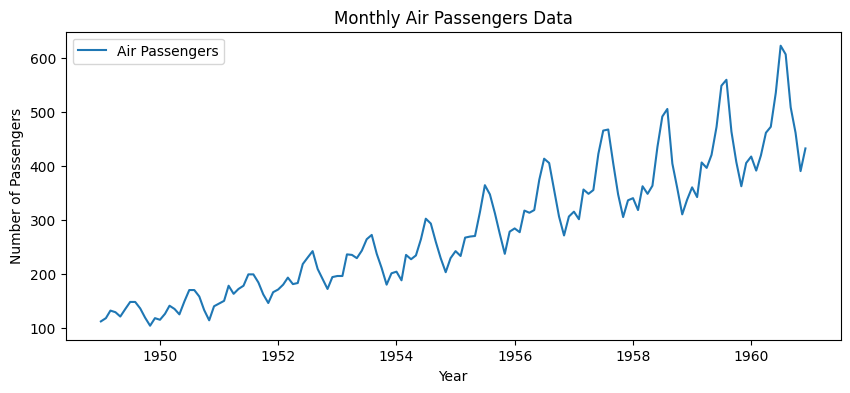

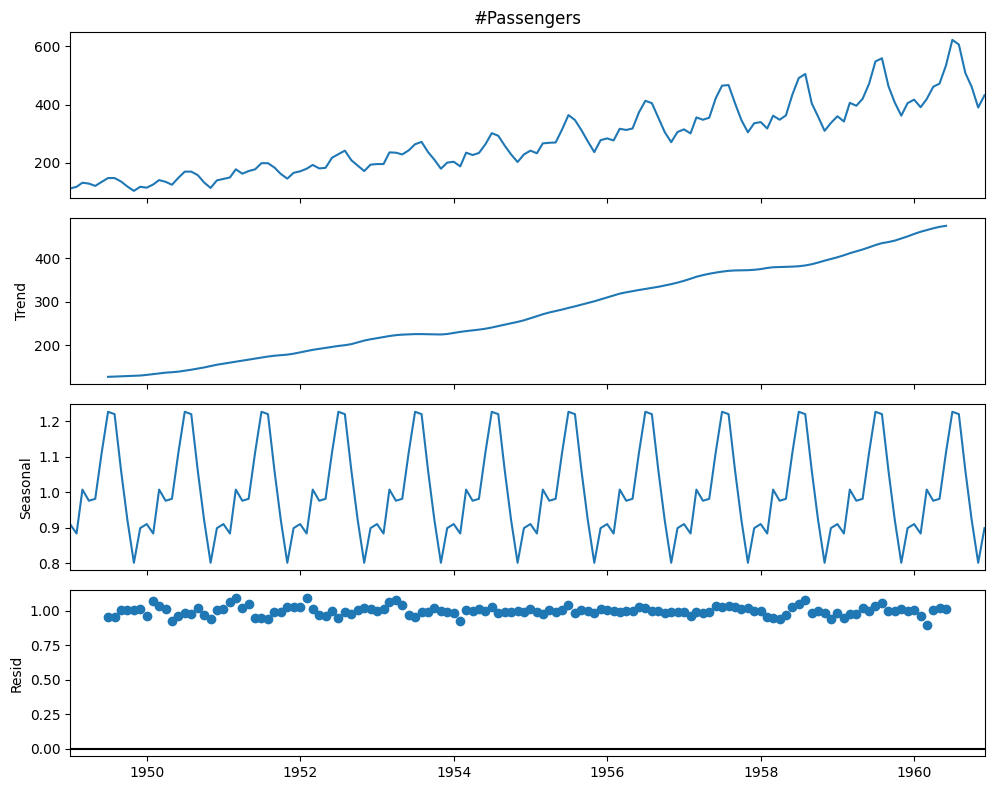

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load the AirPassengers dataset

df = pd.read_csv("/AirPassengers.csv", parse_dates=['Month'], index_col='Month')

print(df.head())

# 2. Plot the original time series

plt.figure(figsize=(10, 4))
plt.plot(df["#Passengers"], label="Air Passengers")
plt.title("Monthly Air Passengers Data")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# 3. Decompose the series

decomposition = seasonal_decompose(df["#Passengers"], model="multiplicative")

# Plot the decomposition
plt.rcParams.update({'figure.figsize': (10, 8)})

decomposition.plot()
plt.show()

**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

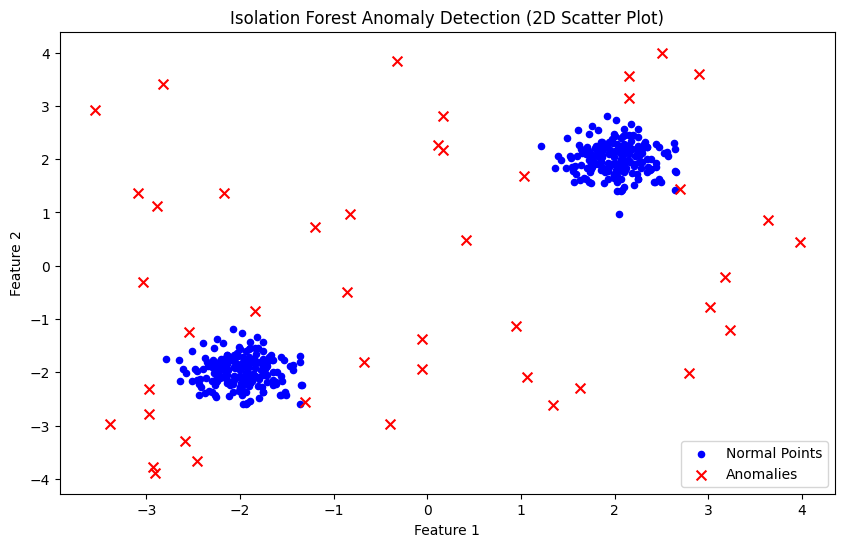

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# --- 1. Load or Generate Dataset ---
df = pd.read_csv('/NYC_taxi_fare_data.csv')

# Generate normal data points (two clusters)
rng = np.random.RandomState(42)
X_train = 0.3 * rng.randn(200, 2)
X_train = np.r_[X_train + 2, X_train - 2]
# Generate some outliers
X_outliers = rng.uniform(low=-4, high=4, size=(40, 2))
X = np.r_[X_train, X_outliers]

# Select the features for the model (e.g., 'fare_amount' and 'distance')
# For this example, we use the generated features X[:, 0] and X[:, 1].

# --- 2. Instantiate and Train Isolation Forest Model ---
# 'contamination' is the proportion of outliers in the data (e.g., 0.1 for 10%).
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)

# --- 3. Predict Anomalies ---
# The predict method returns 1 for normal points and -1 for anomalies.
predictions = model.predict(X)

# Separate anomalies and normal points for visualization
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# --- 4. Visualize the Anomalies on a 2D Scatter Plot ---
plt.figure(figsize=(10, 6))

# Plot normal points in blue
plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Points', s=20)

# Plot anomalies in red
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies', s=50, marker='x')

plt.title('Isolation Forest Anomaly Detection (2D Scatter Plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.**

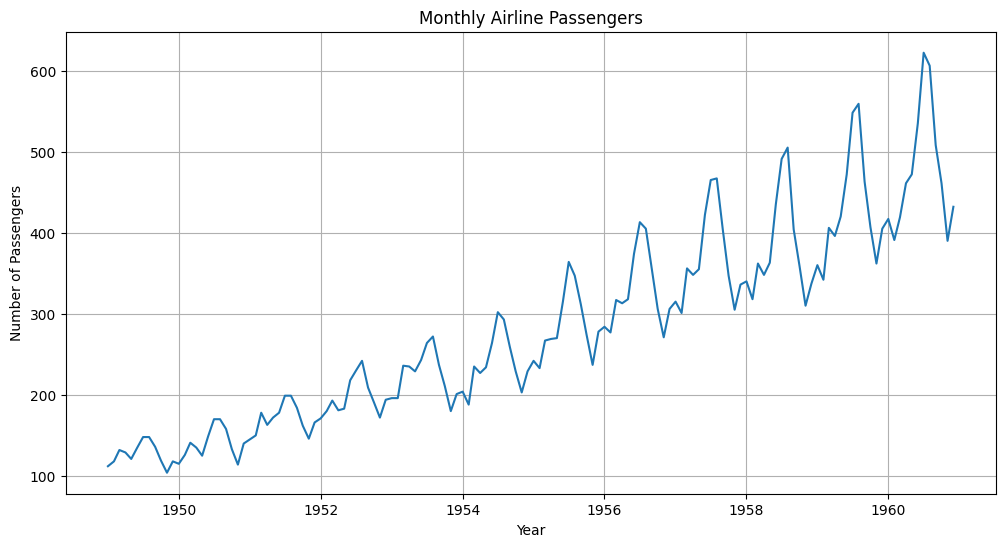

                                     SARIMAX Results                                      
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(5, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -504.706
Date:                            Mon, 17 Nov 2025   AIC                           1023.412
Time:                                    05:12:03   BIC                           1043.538
Sample:                                01-01-1949   HQIC                          1031.590
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3150      0.085     -3.693      0.000      -0.482      -0.148
ar.L2         -0.0390      0.114   

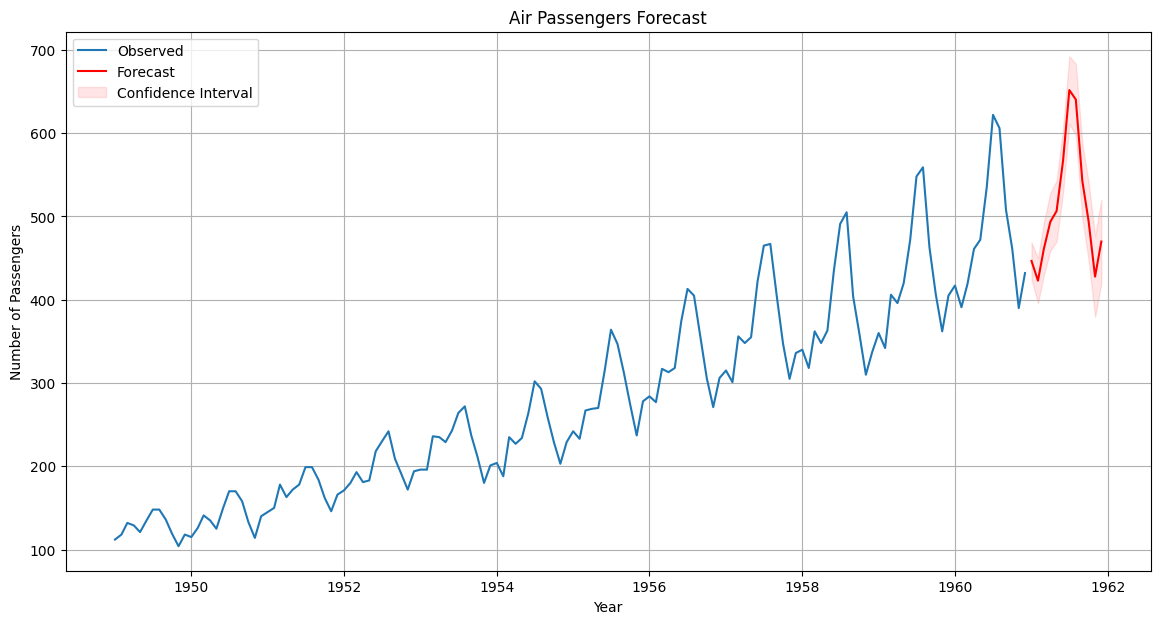

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# --- 1. Load and Prepare Data ---
# Assume the CSV is in the same directory or provide the correct path
file_path = '/AirPassengers.csv'
df = pd.read_csv(file_path)

# Rename columns for clarity (assuming they are 'Month' and 'Passengers')
df.rename(columns={'Month': 'month', '#Passengers': 'passengers'}, inplace=True)

# Convert 'month' to datetime and set it as the index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Create a time series object
time_series = df['passengers']

# --- 2. Visualize the Time Series ---
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# --- 3. Determine SARIMA Model Order (p,d,q)(P,D,Q,m) ---
# You can manually choose an order or use auto_arima, but for this example, we will use a common order.
# A common order for this dataset is (5, 1, 0)(1, 1, 0, 12)
# p=5, d=1, q=0 for the non-seasonal part
# P=1, D=1, Q=0, m=12 for the seasonal part

# --- 4. Train the SARIMA Model ---
# Define the order
order = (5, 1, 0)
seasonal_order = (1, 1, 0, 12)

# Create and fit the SARIMA model
model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Print the model summary
print(results.summary())

# --- 5. Forecast the next 12 months ---
# Forecast the next 12 periods
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# --- 6. Visualize the results ---
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='red', alpha=0.1, label='Confidence Interval')

plt.title('Air Passengers Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.**

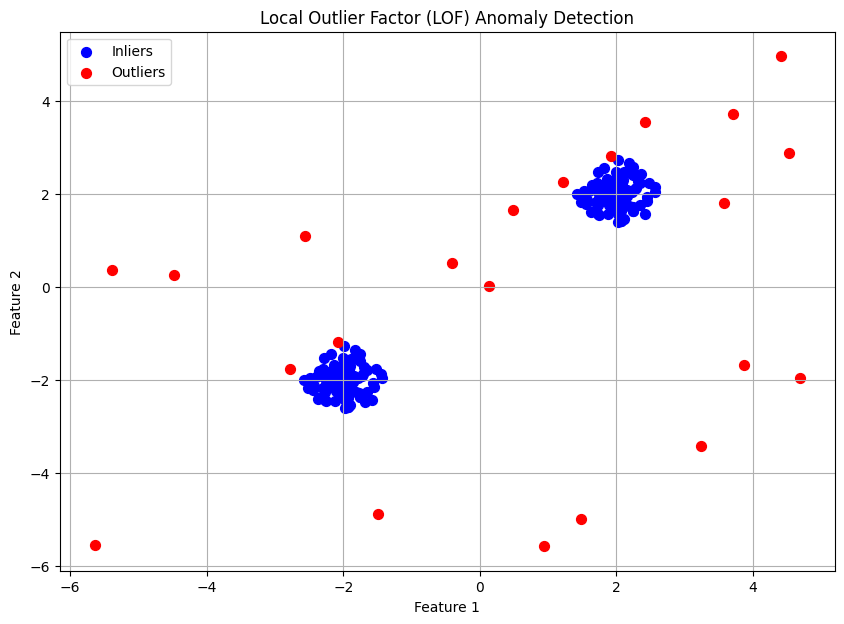

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. Generate a Sample Dataset
np.random.seed(42)
# Inliers (clustered data)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Outliers (scattered data)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# 2. Apply LOF
# n_neighbors: number of neighbors to consider for local density calculation
# contamination: proportion of outliers in the dataset (can be 'auto' or a float)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X) # -1 for outliers, 1 for inliers

negative_outlier_factor = lof.negative_outlier_factor_
outlier_scores = -negative_outlier_factor

# 3. Visualize Results
plt.figure(figsize=(10, 7))
plt.title("Local Outlier Factor (LOF) Anomaly Detection")

# Plot inliers in blue
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='blue', s=50, label='Inliers')

# Plot outliers in red
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='red', s=50, label='Outliers')

# Optionally, visualize the outlier scores as marker size or color intensity
# For example, using the negative_outlier_factor to scale marker size
# plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='RdBu', s=20 * (1 - negative_outlier_factor))

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
- How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
- Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
- How would you validate and monitor the performance over time?
- How would this solution help business decisions or operations?

As a data scientist for a power grid monitoring company, the real-time data science workflow for forecasting energy demand and detecting anomalies involves specific methodologies for handling streaming data:

- **Anomaly Detection:** I would utilize the Isolation Forest method for real-time anomaly detection. Its efficiency with high-volume, streaming data makes it suitable for quickly identifying energy spikes or drops as they occur, without needing the explicit density assumptions of DBSCAN or LOF.

- **Short-Term Forecasting:** For short-term forecasting, I would use the SARIMAX model. This choice is optimal because it can model seasonality (daily/weekly patterns) and incorporate exogenous variables like weather conditions to improve forecast accuracy.

- **Validation and Monitoring:** Performance would be validated using rolling-origin cross-validation on recent data. Continuous monitoring involves tracking forecast errors (e.g., RMSE, MAE) and retraining models when performance drifts or significant structural breaks are detected.

- **Business Decisions/Operations:** This solution aids decisions by enabling predictive maintenance, optimizing power generation to meet forecasted demand, preventing blackouts during anomalies, and efficiently managing energy resources.